In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
from pandas import Series,DataFrame
# For reading stock data from yahoo
from pandas_datareader import DataReader
from matplotlib import dates as mpl_dates
from scipy.stats import pearsonr
from yellowbrick.features import Rank2D

# For time stamps
from datetime import datetime, timedelta

# For division
from __future__ import division

C:\Users\ghazaleh.abadian\AppData\Local\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
end


datetime.datetime(2024, 1, 24, 10, 57, 7, 560332)

In [4]:
start = datetime(end.year - 1,end.month,end.day)
start

datetime.datetime(2023, 1, 24, 0, 0)

In [5]:
#For loop for grabing yahoo finance data and setting as a dataframe
tech_list = ['AAPL','GOOG','MSFT','AMZN']

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
     globals()[stock] = yf.download(stock, start=start, end=end).reset_index()
    #stock_data = yf.download(stock, start=start, end=end)
    
    
    

   

    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
GOOG

Date        Open        High         Low       Close   Adj Close  \
0   2023-01-24   99.550003  101.089996   98.699997   99.209999   99.209999   
1   2023-01-25   97.199997   97.720001   95.262001   96.730003   96.730003   
2   2023-01-26   98.279999   99.209999   96.820000   99.160004   99.160004   
3   2023-01-27   99.050003  101.580002   98.970001  100.709999  100.709999   
4   2023-01-30   98.745003   99.408997   97.519997   97.949997   97.949997   
..         ...         ...         ...         ...         ...         ...   
246 2024-01-17  142.910004  143.410004  140.509995  142.889999  142.889999   
247 2024-01-18  143.440002  145.585007  143.350006  144.990005  144.990005   
248 2024-01-19  146.304993  148.039993  145.800003  147.970001  147.970001   
249 2024-01-22  148.710007  150.014999  147.580002  147.710007  147.710007   
250 2024-01-23  147.720001  148.860001  147.190002  148.679993  148.679993   

       Volume  
0    27391400  
1    31000900  
2    24542100  
3    29020400  
4    24365100  
..        ...  
246  17884500  
247  18876800  
248  27170900  
249  21829200  
250  14096600  

[251 rows x 7 columns]

In [7]:
# Summary Stats
AAPL.head()

Date        Open        High         Low       Close   Adj Close  \
0 2023-01-24  140.309998  143.160004  140.300003  142.529999  141.737747   
1 2023-01-25  140.889999  142.429993  138.809998  141.860001  141.071487   
2 2023-01-26  143.169998  144.250000  141.899994  143.960007  143.159821   
3 2023-01-27  143.160004  147.229996  143.080002  145.929993  145.118835   
4 2023-01-30  144.960007  145.550003  142.850006  143.000000  142.205139   

     Volume  
0  66435100  
1  65799300  
2  54105100  
3  70555800  
4  64015300

In [8]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


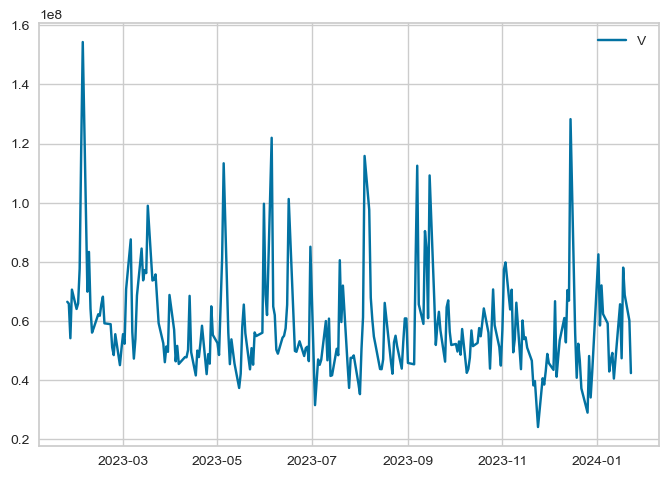

In [9]:
plt.plot(AAPL['Date'], AAPL['Volume'])
plt.legend('Volume')

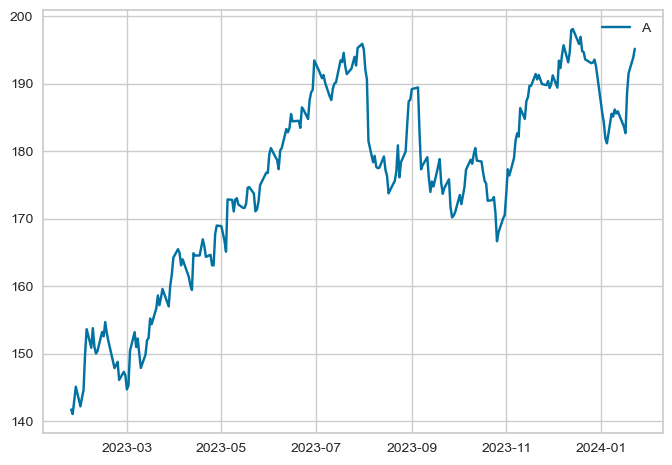

In [10]:
plt.plot(AAPL['Date'], AAPL['Adj Close'])
plt.legend('Adj Close')

In [11]:
# caculate the moving average for the stock.and consider ploting out for several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    #add new column 
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [12]:
AAPL

Date        Open        High         Low       Close   Adj Close  \
0   2023-01-24  140.309998  143.160004  140.300003  142.529999  141.737747   
1   2023-01-25  140.889999  142.429993  138.809998  141.860001  141.071487   
2   2023-01-26  143.169998  144.250000  141.899994  143.960007  143.159821   
3   2023-01-27  143.160004  147.229996  143.080002  145.929993  145.118835   
4   2023-01-30  144.960007  145.550003  142.850006  143.000000  142.205139   
..         ...         ...         ...         ...         ...         ...   
246 2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
247 2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
248 2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
249 2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   
250 2024-01-23  195.020004  195.750000  193.830002  195.179993  195.179993   

       Volume  MA for 10 days  MA for 20 days  MA for 50 days  
0    66435100             NaN             NaN             NaN  
1    65799300             NaN             NaN             NaN  
2    54105100             NaN             NaN             NaN  
3    70555800             NaN             NaN             NaN  
4    64015300             NaN             NaN             NaN  
..        ...             ...             ...             ...  
246  47317400      184.204999      188.796999      189.292038  
247  78005800      184.642999      188.434000      189.536287  
248  68741000      185.607999      188.164999      189.787603  
249  60133900      186.878999      188.117999      190.033787  
250  42300900      187.840999      188.142999      190.284400  

[251 rows x 10 columns]

<Axes: >

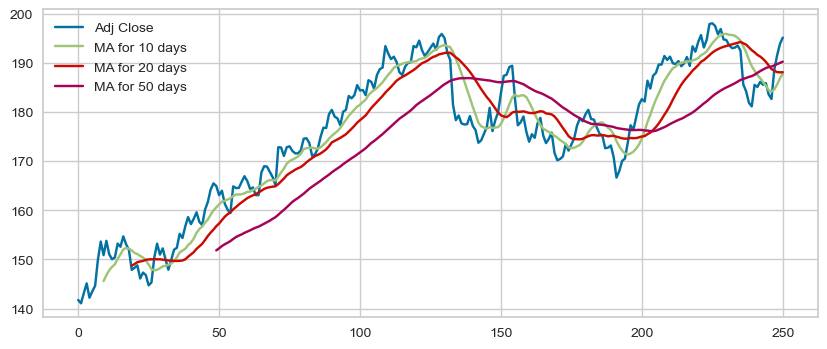

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

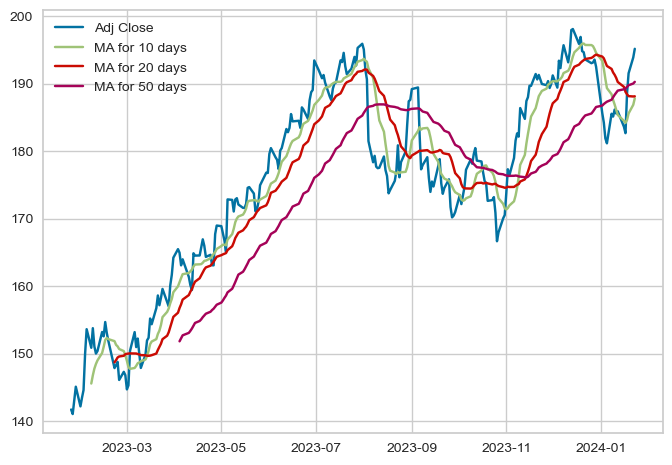

In [14]:
plt.plot(AAPL['Date'], AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']])
plt.legend(['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days'])

# Section 2 - Daily Return Analysis

We're now going to analyze the risk of the stock.In order to do so we'll need to take a closer look at the daily changes of the stock


In [15]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<Figure size 1200x400 with 0 Axes>

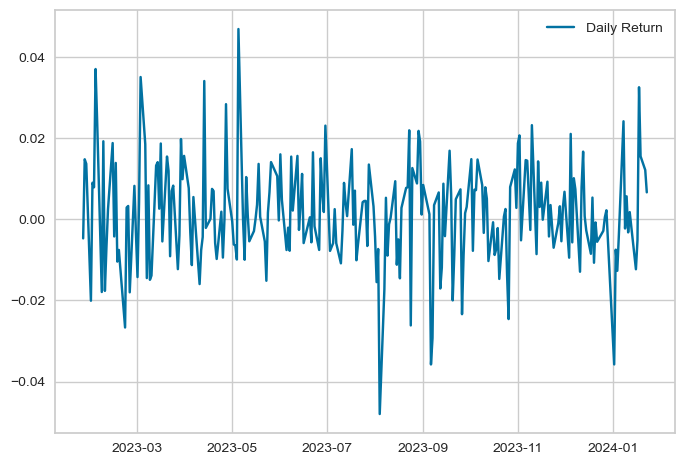

<Figure size 1200x400 with 0 Axes>

In [16]:

plt.plot(AAPL['Date'],AAPL['Daily Return' ])
plt.legend(['Daily Return'])

plt.figure(figsize=(12, 4))

 We'll use seaborn to create a histogram in order to get an overall look at the average daily return.

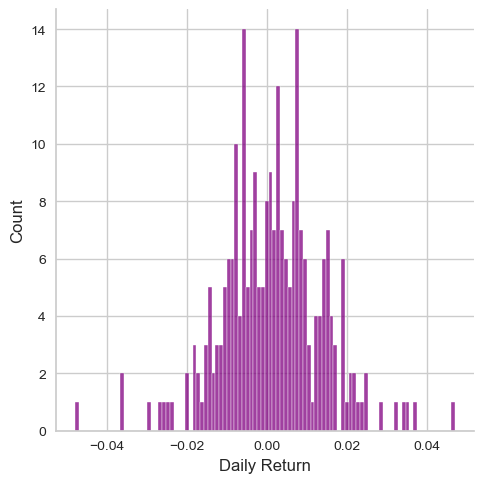

In [17]:
#use the dropna() here
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
tech_list = ['AAPL','GOOG','MSFT','AMZN']
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']




[*********************100%%**********************]  4 of 4 completed


In [19]:
# Let's take a quick look
closing_df.head()

Ticker            AAPL        AMZN        GOOG        MSFT
Date                                                      
2023-01-24  141.737747   96.320000   99.209999  239.912720
2023-01-25  141.071472   97.180000   96.730003  238.495285
2023-01-26  143.159821   99.220001   99.160004  245.820328
2023-01-27  145.118835  102.239998  100.709999  245.978943
2023-01-30  142.205139  100.550003   97.949997  240.576828

Now that we have all the closing prices, let's get the daily return for all the stocks using pct_change()

In [20]:

tech_rets = closing_df.pct_change().dropna()

In [21]:
tech_rets

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-01-25 -0.004701  0.008929 -0.024997 -0.005908
2023-01-26  0.014803  0.020992  0.025121  0.030714
2023-01-27  0.013684  0.030437  0.015631  0.000645
2023-01-30 -0.020078 -0.016530 -0.027405 -0.021962
2023-01-31  0.009021  0.025659  0.019602  0.021013
...              ...       ...       ...       ...
2024-01-17 -0.005174 -0.009467 -0.008259 -0.002050
2024-01-18  0.032571  0.011799  0.014697  0.011297
2024-01-19  0.015533  0.011987  0.020553  0.012187
2024-01-22  0.012163 -0.003605 -0.001757 -0.005418
2024-01-23  0.006653  0.008011  0.006567  0.006028

[250 rows x 4 columns]

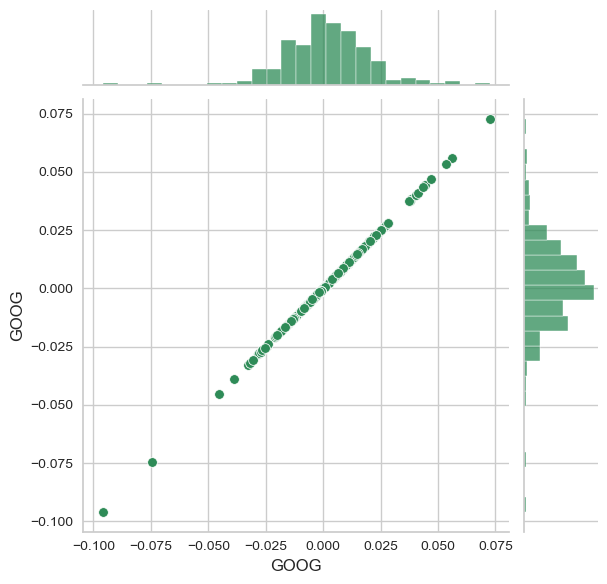

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

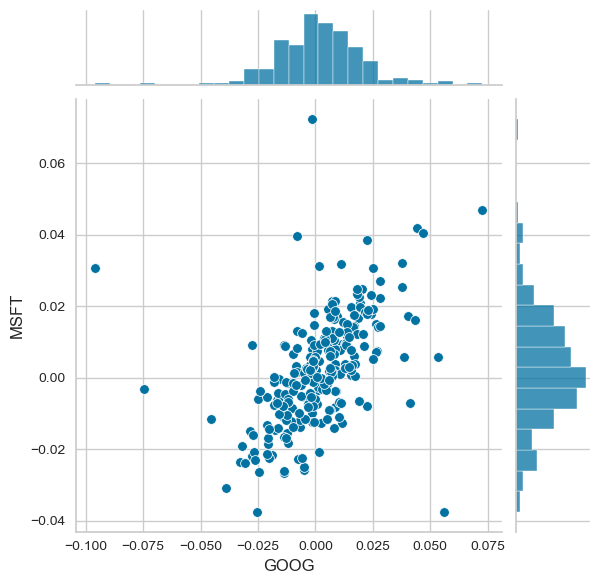

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

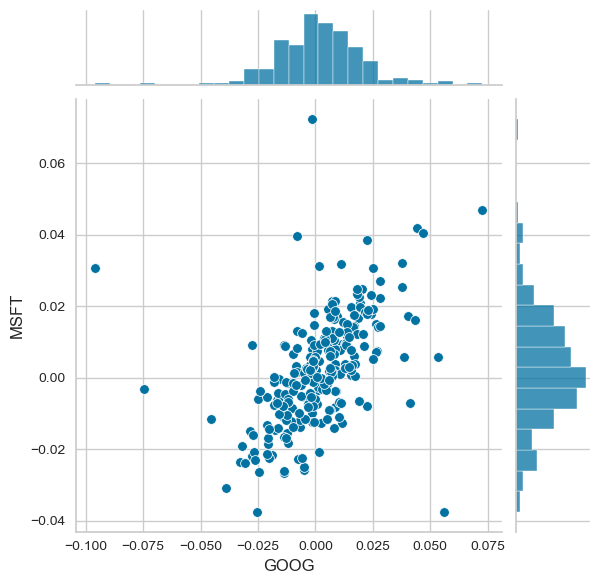

In [24]:
join=sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')



In [25]:
corr = tech_rets['GOOG'].corr(tech_rets['MSFT'])

In [26]:
join.ax_joint.text(-1, 1, f"Pearsonr = {corr:.2f}", horizontalalignment='center', verticalalignment='center', size=10, color='red')

Text(-1, 1, 'Pearsonr = 0.51')

In [27]:
corr = pearsonr(tech_rets['GOOG'], tech_rets['MSFT'])

In [28]:
corr,_

(PearsonRResult(statistic=0.5123850788649675, pvalue=3.886969510860081e-18),
 Text(-1, 1, 'Pearsonr = 0.51'))

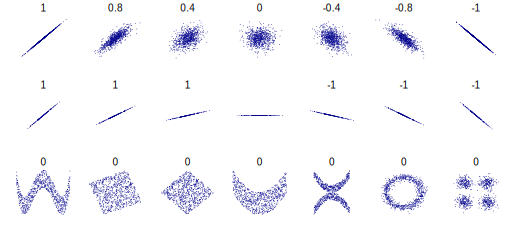

In [29]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

the pearsonr value correlation coefficient can give us a sense of how correlated the daily percentage returns are.

 We can use sns.pairplot() to automatically create this plot

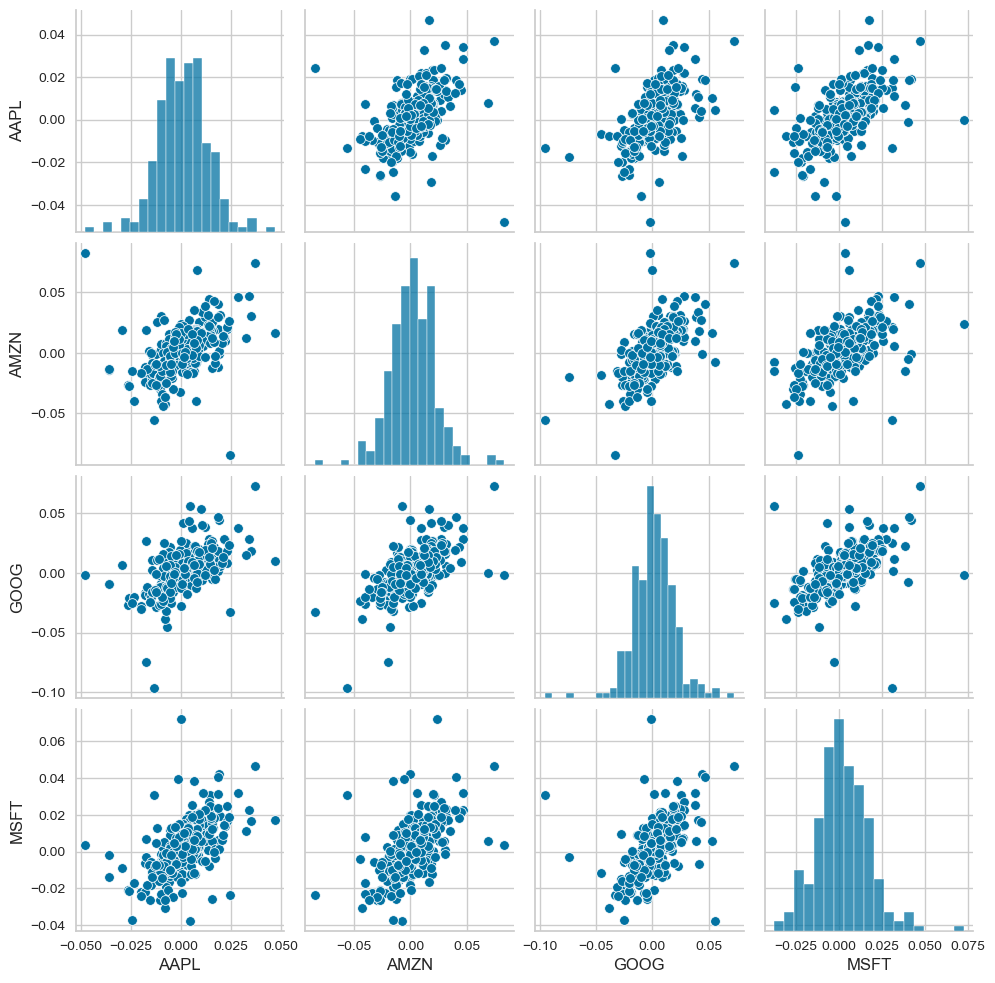

In [30]:
# We can call pairplot on our DataFrame where we already drop NaN value, for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows a correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

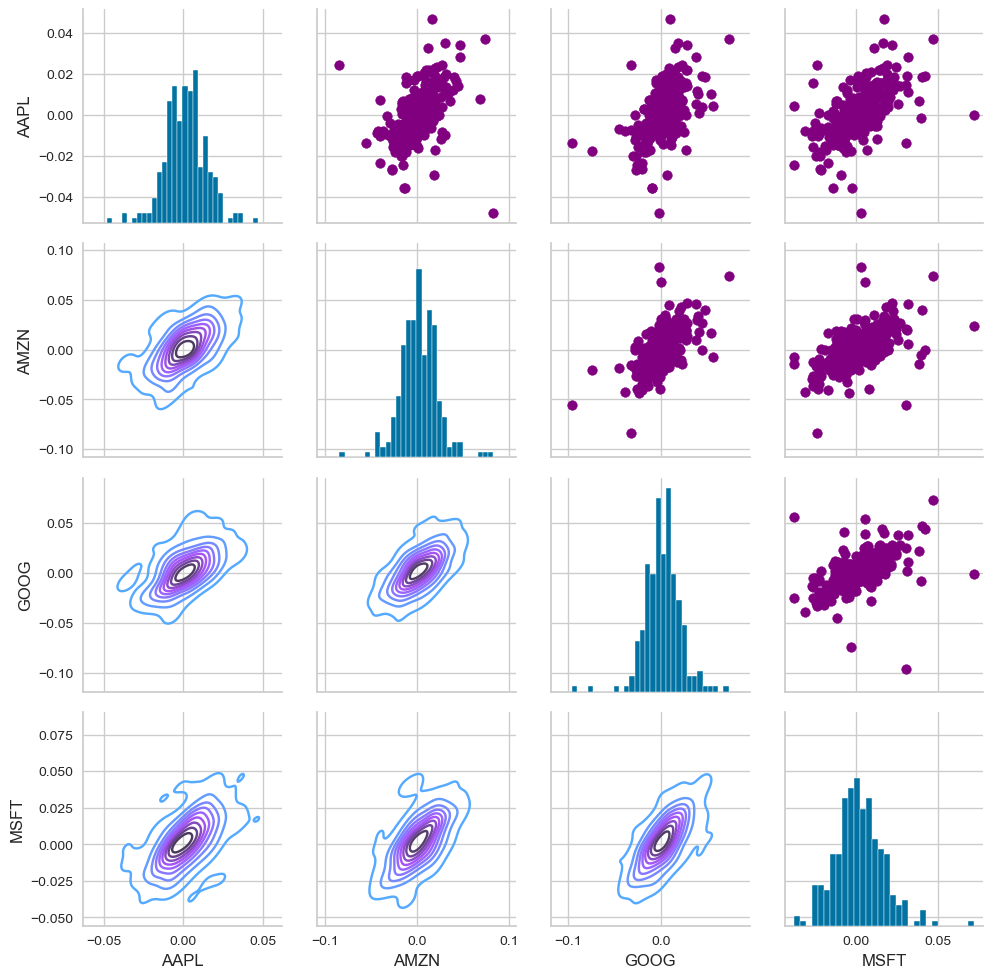

In [31]:
returns_fig = sns.PairGrid(tech_rets)
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# here we define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using the exact same technique. 

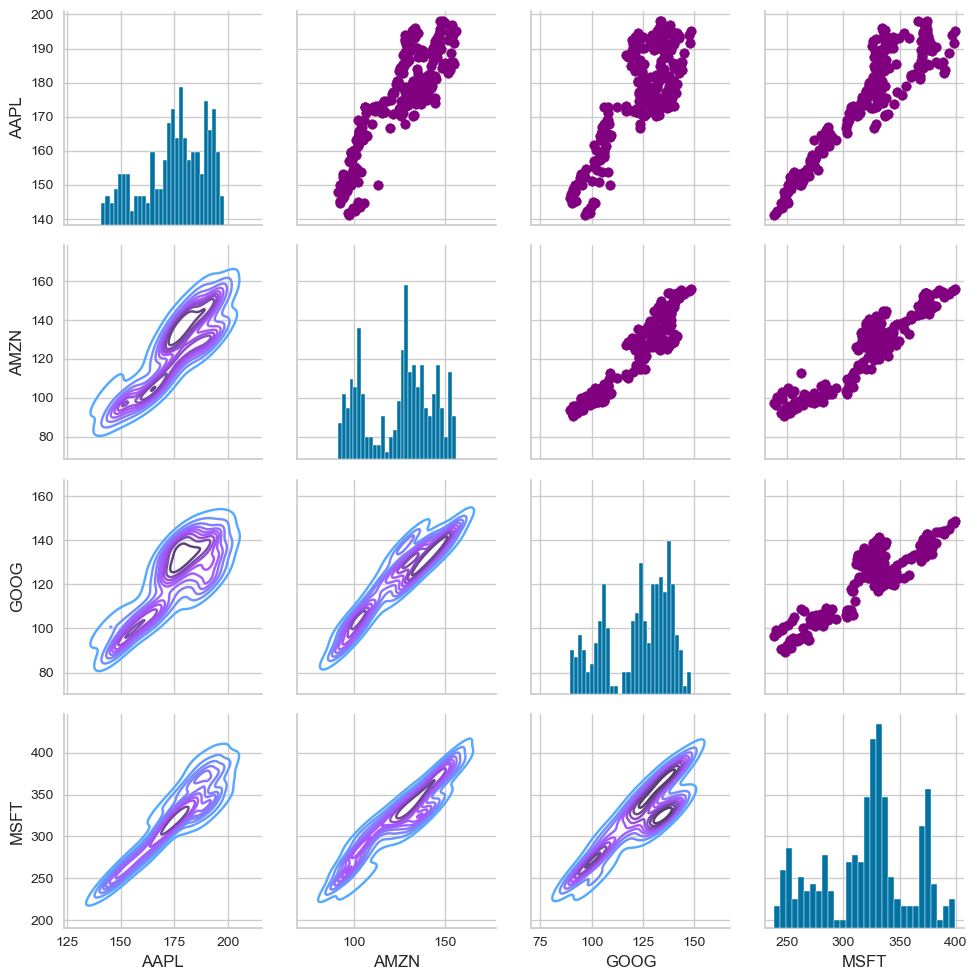

In [32]:

returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

 we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

In [33]:
corr_values=tech_rets.corr()

<Axes: xlabel='Ticker', ylabel='Ticker'>

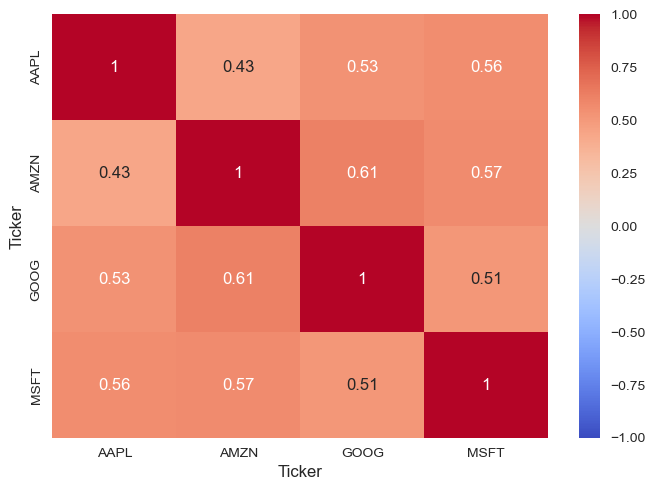

In [34]:
sns.heatmap(corr_values, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [35]:
corr_closing_value=closing_df.corr()

<Axes: xlabel='Ticker', ylabel='Ticker'>

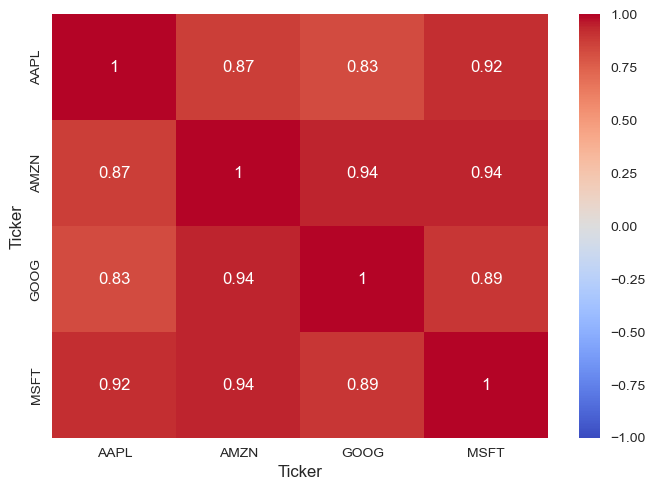

In [36]:
sns.heatmap(corr_closing_value, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return.

# Risk Analysis

 we can quantify risk, using the information we've gathered on daily percentage returns, comparing the expected return with the standard deviation of the daily returns.

In [37]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()


In [38]:
area = np.pi*40

Text(0, 0.5, 'Risk')

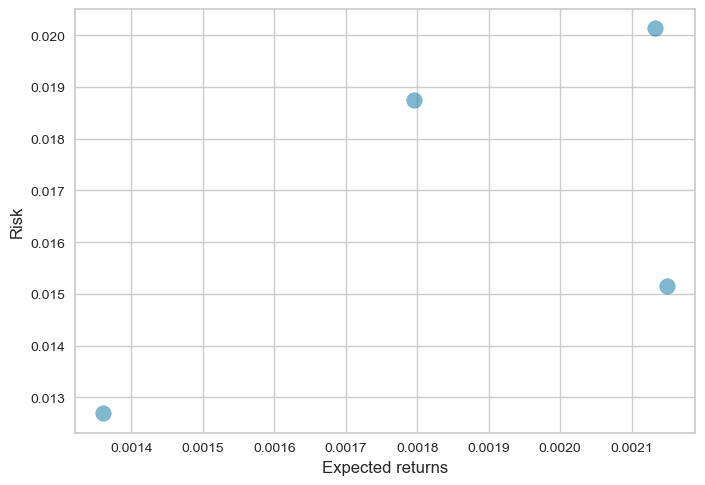

In [39]:
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.xlabel('Expected returns')
plt.ylabel('Risk')

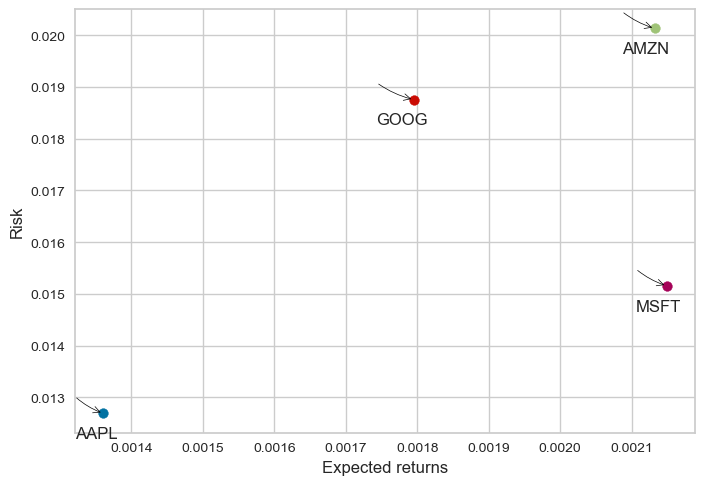

In [40]:
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.scatter(x, y)
    plt.annotate(
        label, 
        xy=(x, y), xytext=(10, -20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black', lw=0.5,  relpos=(0,3) ))

plt.xlabel('Expected returns')
plt.ylabel('Risk')


plt.show()


# Value at Risk for our stocks

We can treat value at risk as the amount of money we could expect to lose for a given interval.

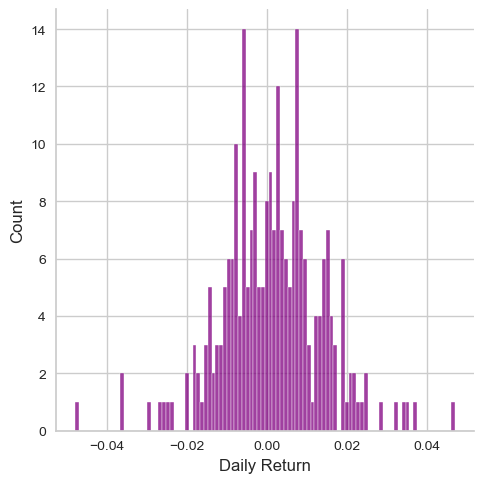

In [41]:

sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [42]:
#we can use quantile to get the risk value for the stock.
rets['AAPL'].quantile(0.05)

-0.017473225867533693

The 0.05 empirical quantile of daily returns is at -0.017. That means that with 95% confidence, our worst daily loss will not exceed 1.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.017 * 1,000,000 = $17,000.

# Value at Risk using the Monte Carlo method

A Monte Carlo simulation is an attempt to predict the future many times over. At the end of the simulation, thousands or millions of "random trials" produce a distribution of outcomes that can be analyzed

For this article, we will use the geometric Brownian motion (GBM), which is technically a Markov process. This means the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH)—past price information is already incorporated, and the next price movement is "conditionally independent" of past price movements.

more info on the Monte Carlo method for stocks: http://www.investopedia.com/articles/07/montecarlo.asp

In [44]:
# Set up our time horizon
days = 365

# define delta
dt = 1/days

# Now let's grab our mu (drift)  نرخ میانگین رشد یا کاهش  from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility   گستردگی نوسانات کوتاه‌مدت قیمت of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [46]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [48]:
GOOG.head()

Date       Open        High        Low       Close   Adj Close  \
0 2023-01-24  99.550003  101.089996  98.699997   99.209999   99.209999   
1 2023-01-25  97.199997   97.720001  95.262001   96.730003   96.730003   
2 2023-01-26  98.279999   99.209999  96.820000   99.160004   99.160004   
3 2023-01-27  99.050003  101.580002  98.970001  100.709999  100.709999   
4 2023-01-30  98.745003   99.408997  97.519997   97.949997   97.949997   

     Volume  
0  27391400  
1  31000900  
2  24542100  
3  29020400  
4  24365100

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

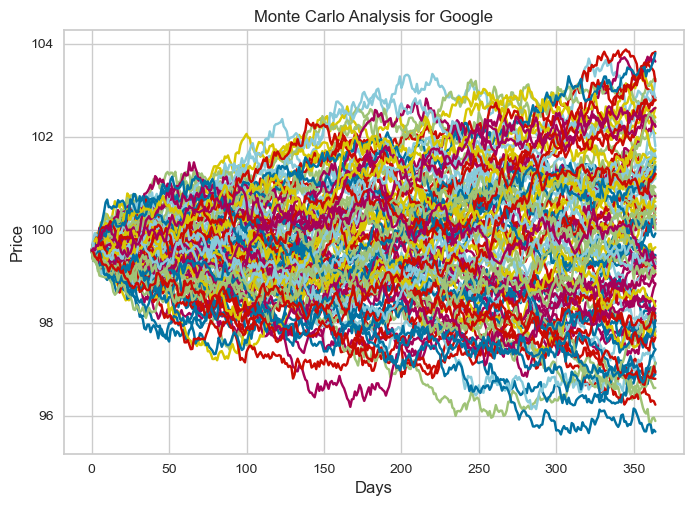

In [49]:
# Get start price from GOOG.head()
start_price = 99.55

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run.

In [51]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [52]:
simulations

array([100.20733066,  97.01540012, 100.0267373 , ...,  98.16108295,
        99.94906394,  98.26030206])

Now that we have our array of simulations, we can go ahead and plot a histogram of all final price,then use qunatile to define our risk for this stock.

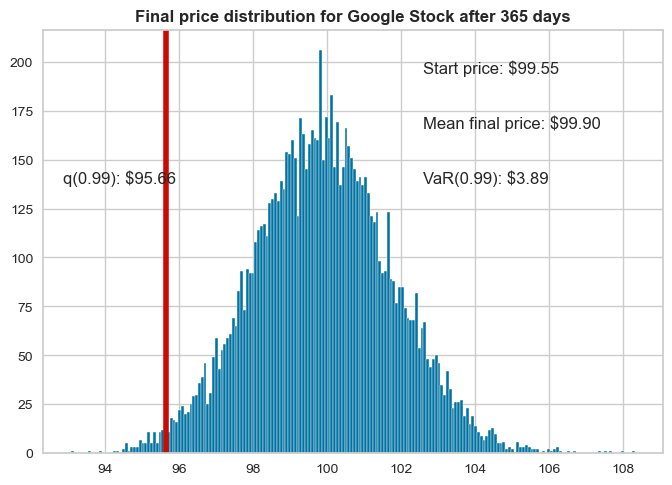

In [53]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $3.89 for every investment of 99.55 (the price of one inital google stock).

This basically menas for every initial stock we purchase our putting about $3.89 at risk 99% of the time from our Monte Carlo Simulation